In [23]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt

# Import local gossip testing framework.
from decentralized import MessageDropStrategy, NextPeerStrategy, Model, Worker, Runner

## TODOS
# * Try resampling the data on the nodes each iteration
# * Try to have message loss

## Config

In [24]:
N_GOSSIP = 512
N_ROUNDS = 20
FEATURE_SIZE = 3

MEAN_LOC = 10
MSG_DROP_PERC = 0.0

In [25]:
datas = np.random.normal(size=(N_GOSSIP,FEATURE_SIZE), loc=MEAN_LOC)
datas_mean = np.zeros(FEATURE_SIZE)
for data in datas:
    datas_mean += data
datas_mean /= N_GOSSIP

## Gossip learning with random choice

In [26]:
from gossip import run_gossip, RandomPeerStrategy
(gossip_errors, gossip_50_errors, gossip_90_errors, gossip_95_errors) = run_gossip(N_GOSSIP, FEATURE_SIZE, N_ROUNDS, datas, datas_mean, MessageDropStrategy(MSG_DROP_PERC))

True mean: 17.37971239393148, from [10.09858699  9.95862389 10.04483717]


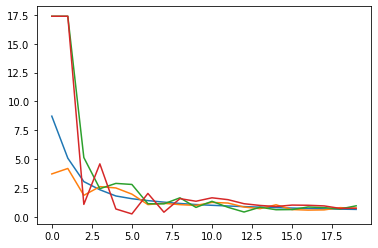

In [27]:
print("True mean: {}, from {}".format(np.linalg.norm(datas_mean), datas_mean))
plt.plot(gossip_errors)
plt.plot(gossip_50_errors)
plt.plot(gossip_90_errors)
plt.plot(gossip_95_errors)

# Federated learning

In [28]:
from recursive_doubling import run_rd, RDPeerStrategy
(rdfl_errors, rdfl_50_errors, rdfl_90_errors, rdfl_95_errors) = run_rd(N_GOSSIP, FEATURE_SIZE, N_ROUNDS, datas, datas_mean, MessageDropStrategy(MSG_DROP_PERC))
#(rdfl_50_errors, rdfl_50_variance) = run_rd(N_GOSSIP, FEATURE_SIZE, N_ROUNDS, datas, datas_mean, MsgDrop())

#### Error rates

actual error: 17.37971239393148 from [10.09858699  9.95862389 10.04483717]


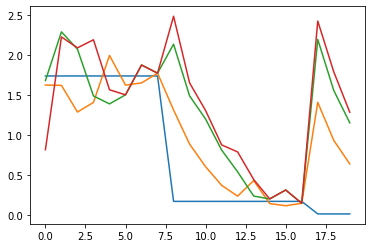

In [29]:
import matplotlib.pyplot as plt
print("actual error: {} from {}".format(np.linalg.norm(datas_mean),datas_mean))
plt.plot(rdfl_errors)
plt.plot(rdfl_50_errors)
plt.plot(rdfl_90_errors)
plt.plot(rdfl_95_errors)

#### Variance

In [30]:
#rf = [len(x) for x in rdfl_variance]
#rf50 = [len(x) for x in rdfl_50_variance]
#print(rf, rf50)
#print(rdfl_variance[0], rdfl_50_variance[0])
#plt.plot(rf, 'b')
#plt.plot(rf50, 'r')

## Gossip learning guided with recursive doubling

In [31]:
(guided_gossip_errors, guided_gossip_50_errors, guided_gossip_90_errors, guided_gossip_95_errors) = run_gossip(N_GOSSIP, FEATURE_SIZE, N_ROUNDS, datas, datas_mean, MessageDropStrategy(MSG_DROP_PERC), RDPeerStrategy())

## Results

#### Error

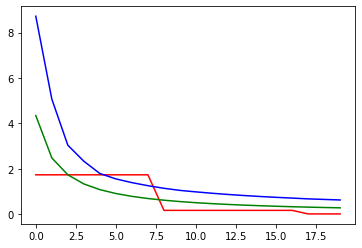

In [32]:
plt.plot(rdfl_errors, 'r')
#plt.plot(rdfl_50_errors, 'purple')
plt.plot(gossip_errors, 'b')
plt.plot(guided_gossip_errors, 'g')

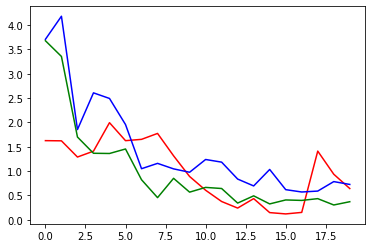

In [33]:
plt.plot(rdfl_50_errors, 'r')
plt.plot(gossip_50_errors, 'b')
plt.plot(guided_gossip_50_errors, 'g')

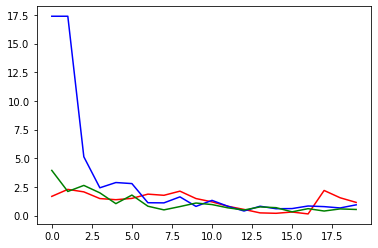

In [34]:
plt.plot(rdfl_90_errors, 'r')
plt.plot(gossip_90_errors, 'b')
plt.plot(guided_gossip_90_errors, 'g')

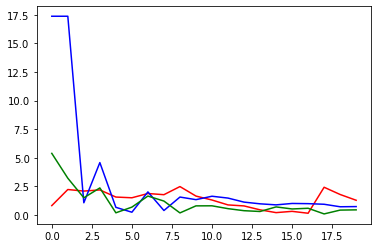

In [35]:
plt.plot(rdfl_95_errors, 'r')
plt.plot(gossip_95_errors, 'b')
plt.plot(guided_gossip_95_errors, 'g')

#### Variance

In [36]:
#rf = [len(x) for x in rdfl_variance]
#rf50 = [len(x) for x in rdfl_50_variance]
#print(rf, rf50)
#print(rdfl_variance[0], rdfl_50_variance[0])
#plt.plot(rf, 'b')
#plt.plot(rf50, 'r')

## RD correctness check

In [37]:
DBG = 0
class val:
    def __init__(self, i, v, paths = [], included = []):
        self.id = i
        self.v = v
    def add(self, a):
        return val(self.id, self.v+a.v)

peers = [val(i,v,[[i]],[i]) for (i,v) in enumerate(range(2048))]
corr = sum([p.v for p in peers])
rdp = RDPeerStrategy(peers)
while True:
    old = peers.copy()
    for i in range(len(peers)):
        nxt = rdp.next_peer(peers[i])
        peers[nxt] = old[nxt].add(old[i])
    if rdp.step():
        break
actual = peers[DBG].v
print("rd sum {}, correct sum {}".format(actual, corr))


rd sum 2096128, correct sum 2096128
